In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**41188 records; 20 independent variable and 1 dependent variable**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are zero null values. but few variable shas unknown, non existent values which needs to be dealt with

In [8]:
# check duplicate
duplicateRows = df[df.duplicated()]
duplicateRows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


there are 12 duplicate rows

In [9]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
obj_columns = []
for i, x in enumerate(df.dtypes.tolist()):
    if x == 'object':
        obj_columns.append(df.columns[i])

for x in obj_columns:
    print(f'Number of Unique Values in {x} column: ', df[x].nunique())


Number of Unique Values in job column:  12
Number of Unique Values in marital column:  4
Number of Unique Values in education column:  8
Number of Unique Values in default column:  3
Number of Unique Values in housing column:  3
Number of Unique Values in loan column:  3
Number of Unique Values in contact column:  2
Number of Unique Values in month column:  10
Number of Unique Values in day_of_week column:  5
Number of Unique Values in poutcome column:  3
Number of Unique Values in y column:  2


Analysis of dependent variable

In [11]:
# unique values in job variable
print(df.y.nunique())
print(df['y'].value_counts())
print(df.y.unique())

2
no     36548
yes     4640
Name: y, dtype: int64
['no' 'yes']


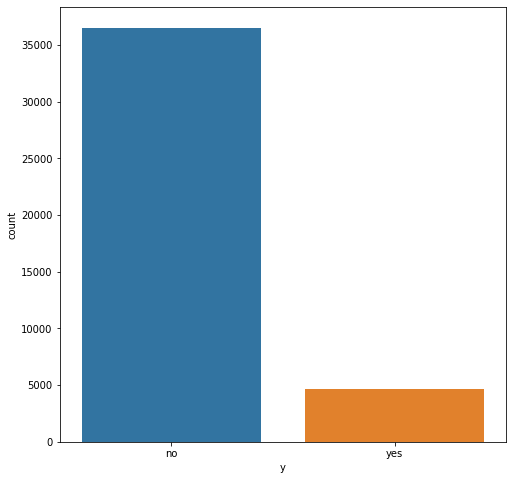

In [12]:
import matplotlib.pyplot as plt
  
fig = plt.gcf() 
fig.set_size_inches(8, 8)
sns.countplot(x ='y', data = df)
# Show the plot
plt.show()


**Analysis job variable**

In [13]:
# unique values in job variable
print(df.job.nunique())
print(df.job.unique())

12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


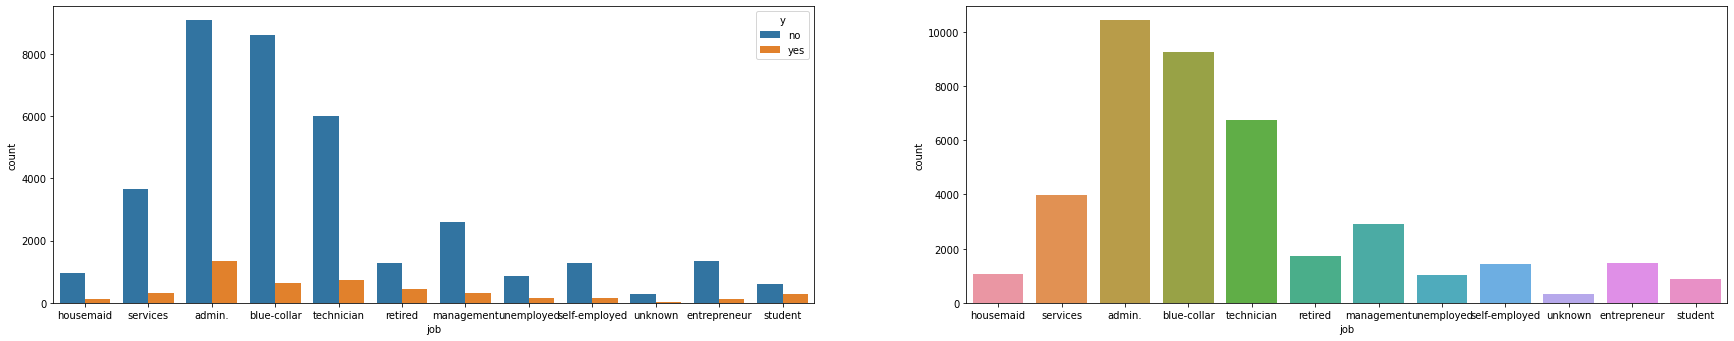

In [14]:

plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='job',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='job', data = df)


**Insights:**

**technical -**
*   need to encode the variables
*   unknown profession needs to be handled

**business -**
*   The clients of differnt professions reached through the campaign is not uniform
*   more the 10k clients reached to where of the admin profession
*   people of house maind, retired, unemployed,self employed and student where contacted the least < 2000
*   min age - 17
*   mean age - 38
*   max age - 98
*   maximum subscription was achieved from admin profession, follwed by techician and retired















Analyse marital variable

In [15]:
# unique values in job variable
print(df.marital.nunique())
print(df.marital.unique())

4
['married' 'single' 'divorced' 'unknown']


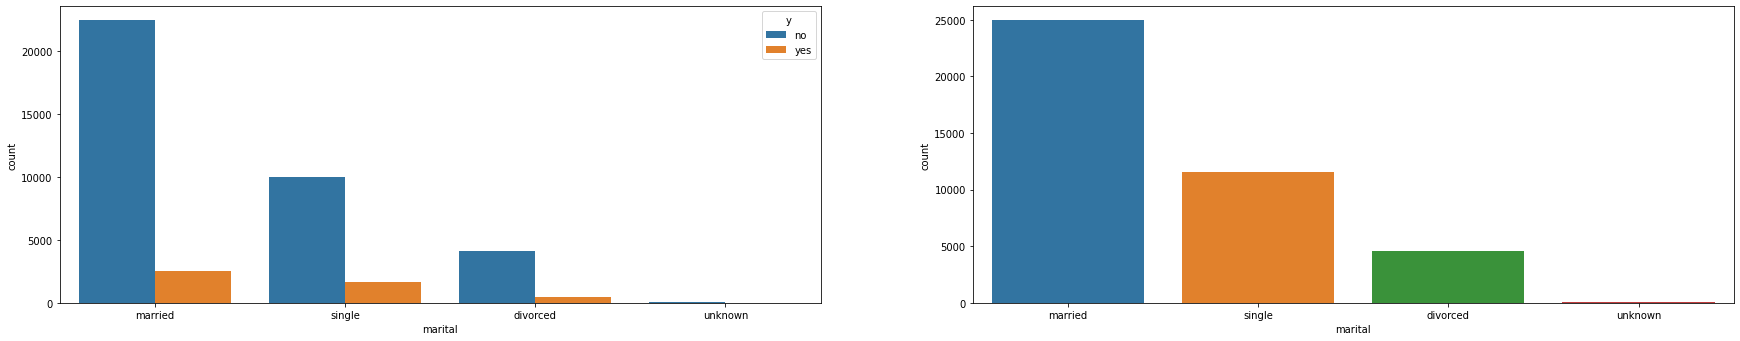

In [16]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='marital',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='marital', data = df)

Analysis - education

In [17]:
# unique values in education variable
print(df.education.nunique())
print(df.education.unique())

8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


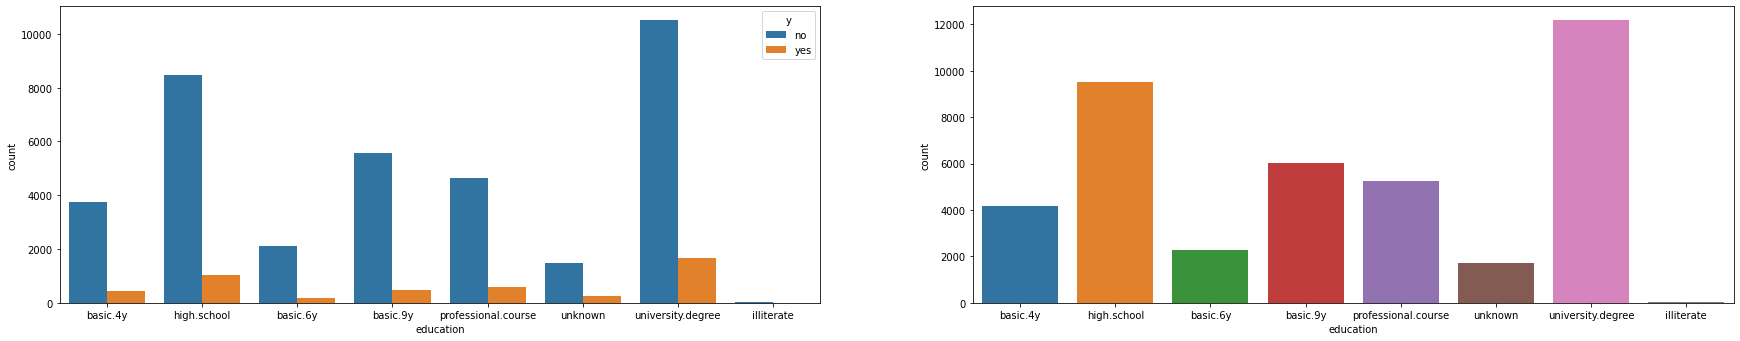

In [18]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='education',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='education', data = df)

In [19]:
# unique values in day_of_week  variable
print(df.day_of_week .nunique())
print(df.day_of_week .unique())

5
['mon' 'tue' 'wed' 'thu' 'fri']


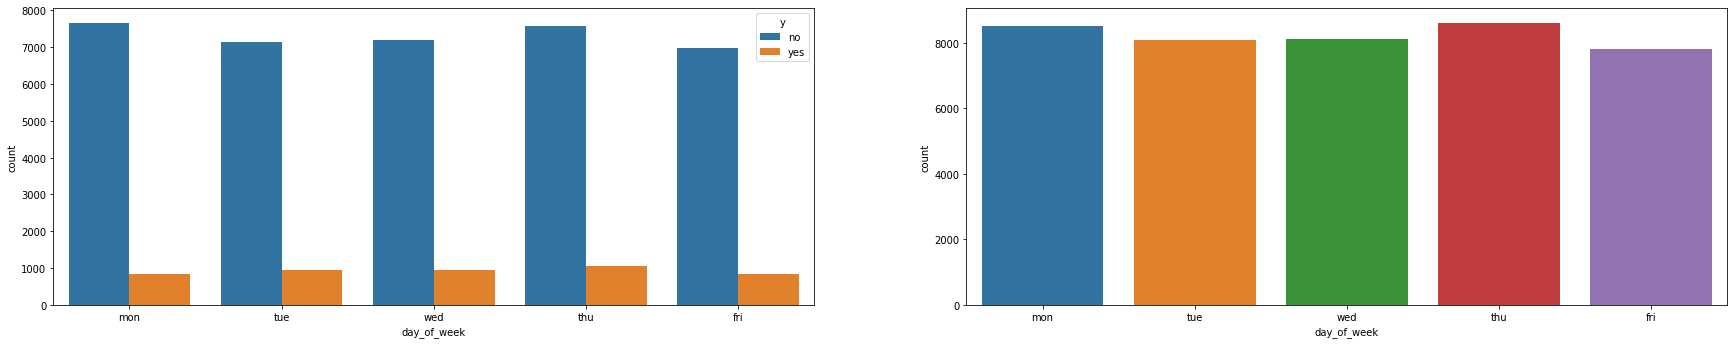

In [20]:
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='day_of_week',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='day_of_week', data = df)

3
['no' 'unknown' 'yes']


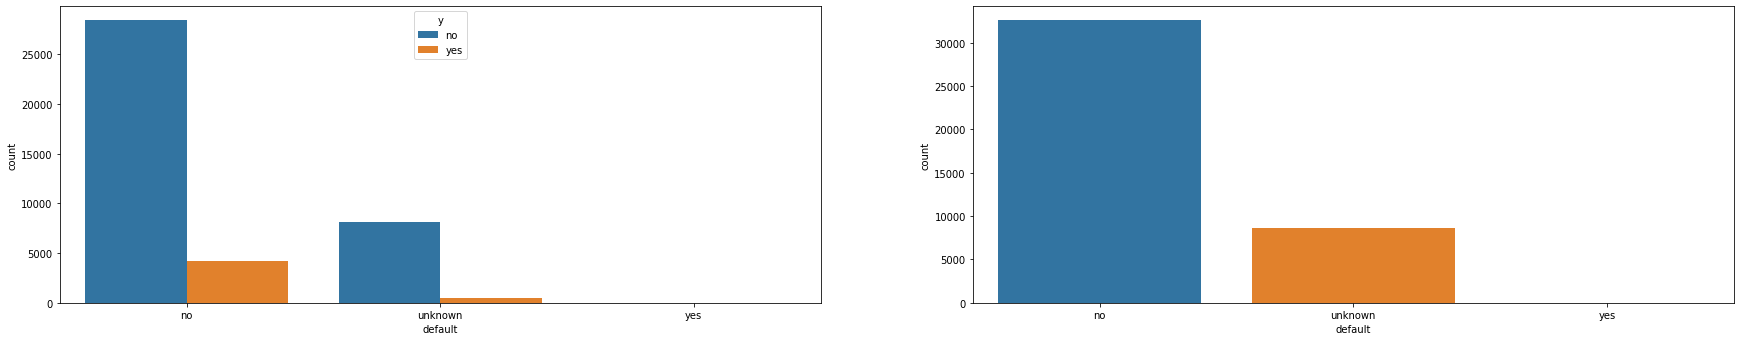

In [21]:
# unique values in default  variable
print(df.default.nunique())
print(df.default.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='default',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='default', data = df)

3
['no' 'yes' 'unknown']


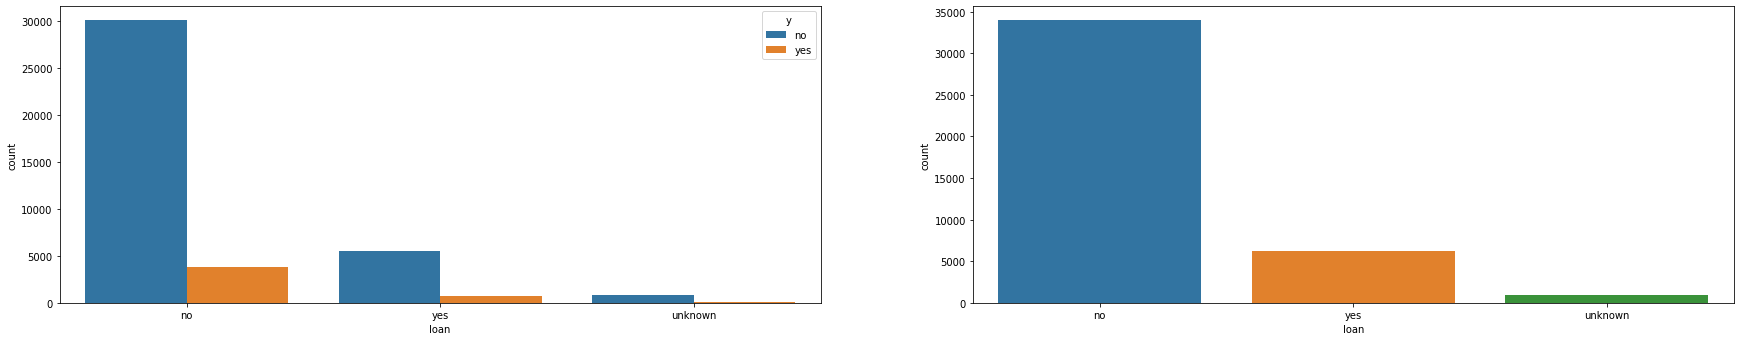

In [22]:
# unique values in loan  variable
print(df.loan.nunique())
print(df.loan .unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='loan',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='loan', data = df)

2
['telephone' 'cellular']


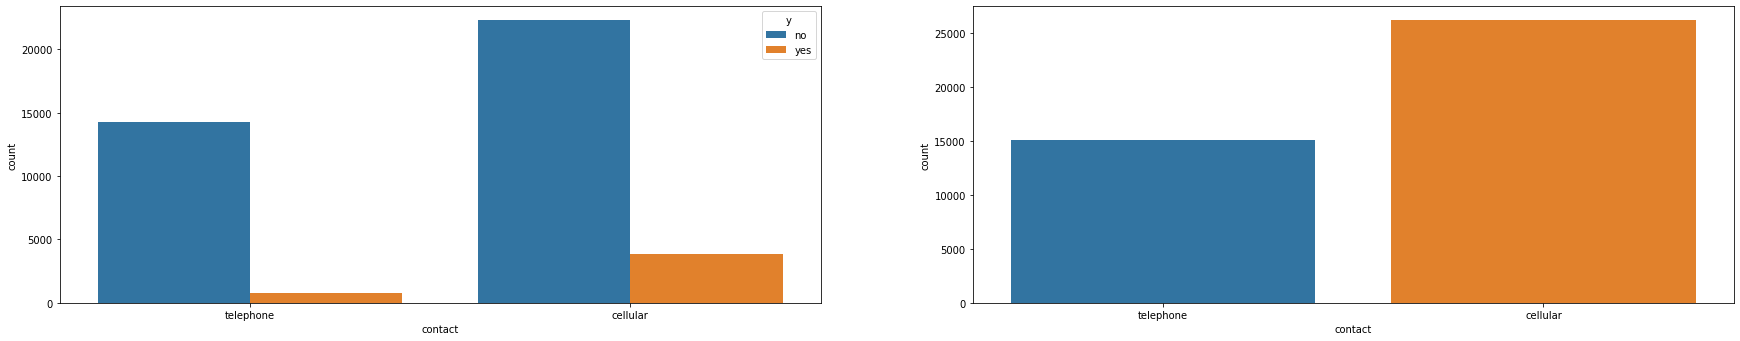

In [23]:
# unique values in contact  variable
print(df.contact.nunique())
print(df.contact.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='contact',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='contact', data = df)

10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


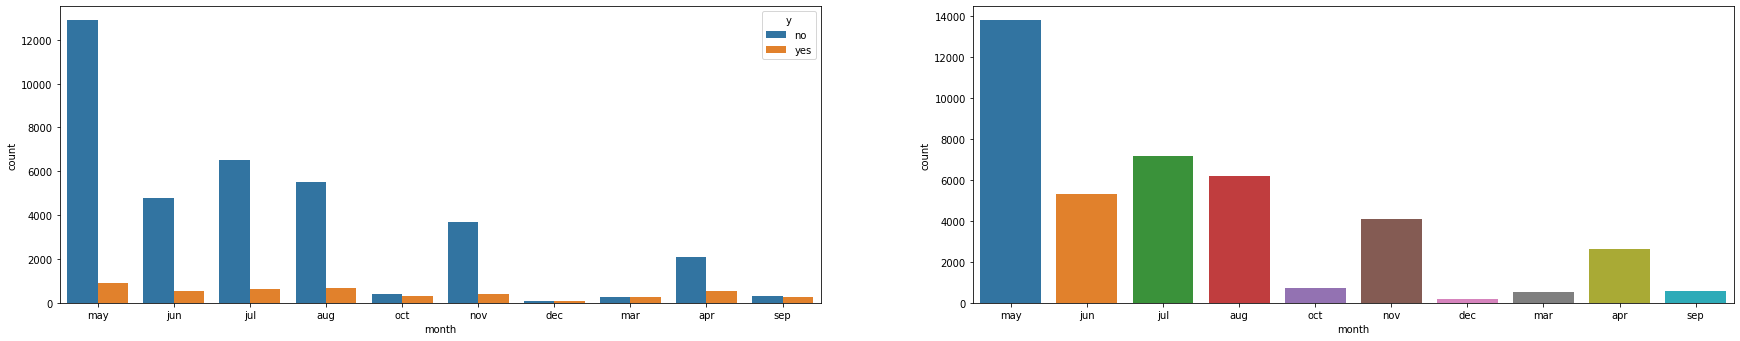

In [24]:
# unique values in month  variable
print(df.month.nunique())
print(df.month.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='month',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='month', data = df)

3
['nonexistent' 'failure' 'success']


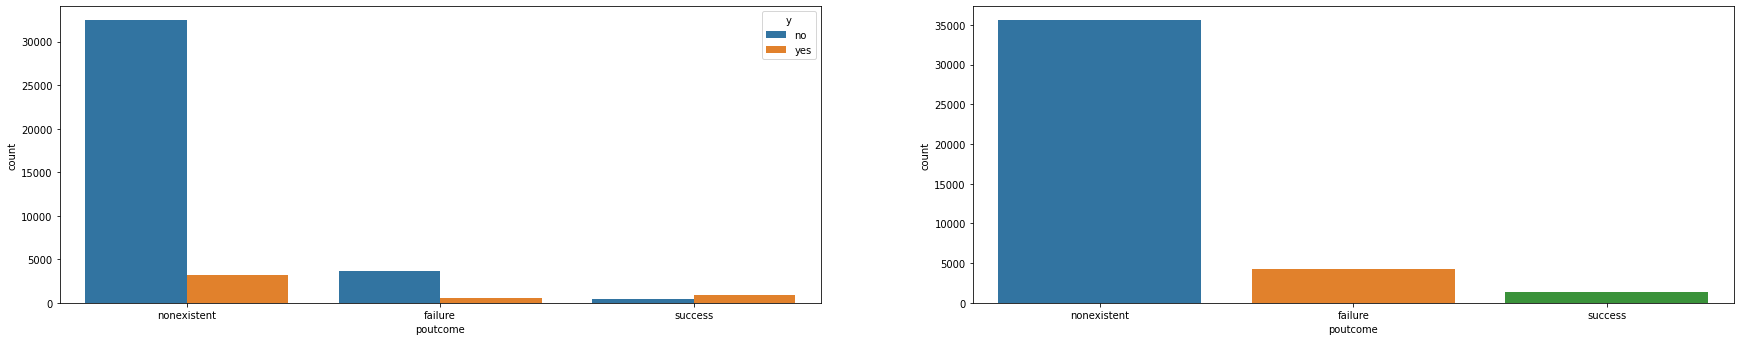

In [25]:
# unique values in poutcome  variable
print(df.poutcome.nunique())
print(df.poutcome.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='poutcome',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='poutcome', data = df)

8
[0 1 2 3 4 5 6 7]


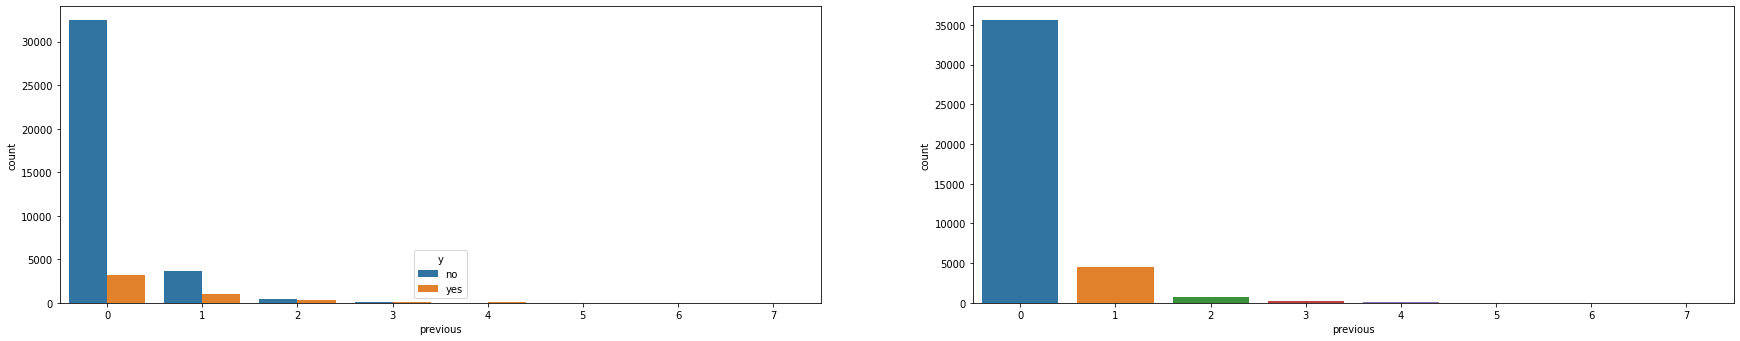

In [26]:
# unique values in previous  variable
print(df.previous.nunique())
print(df.previous.unique())
plt.figure(figsize=[30,12])

plt.subplot(2,2,1)
sns.countplot(x ='previous',hue = 'y', data = df)
plt.subplot(2,2,2)
sns.countplot(x ='previous', data = df)

27
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


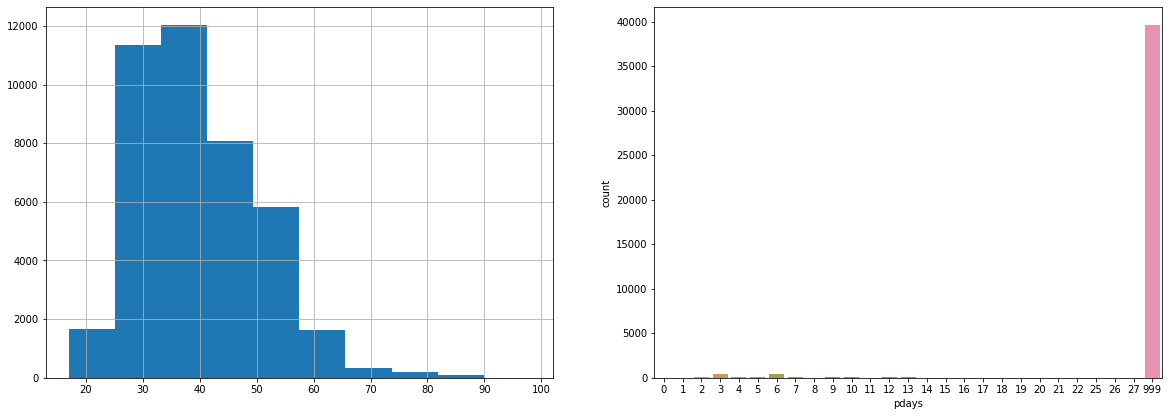

In [27]:
# unique values in pdays and age  variable
print(df.pdays.nunique())
print(df.pdays.unique())

plt.subplot(2,2,1)
df.age.hist(bins=10, figsize=(20,15))
plt.subplot(2,2,2)
sns.countplot(x ='pdays', data = df)

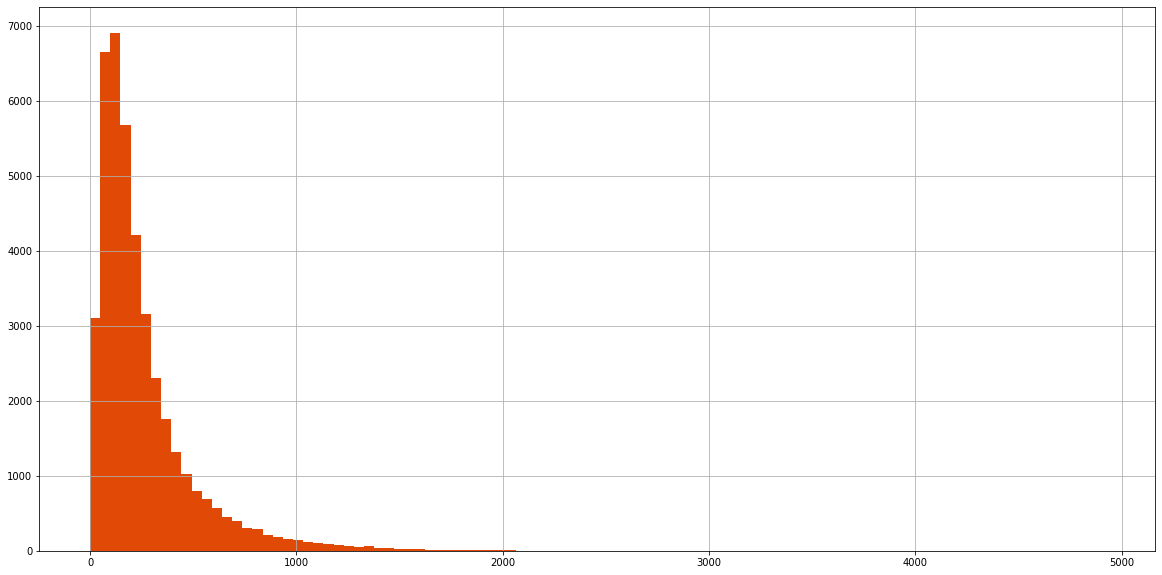

In [28]:
#Note - convert to minutes
df.duration.hist(bins=100, figsize=(20,10), color='#E14906')
plt.show()

In [29]:
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

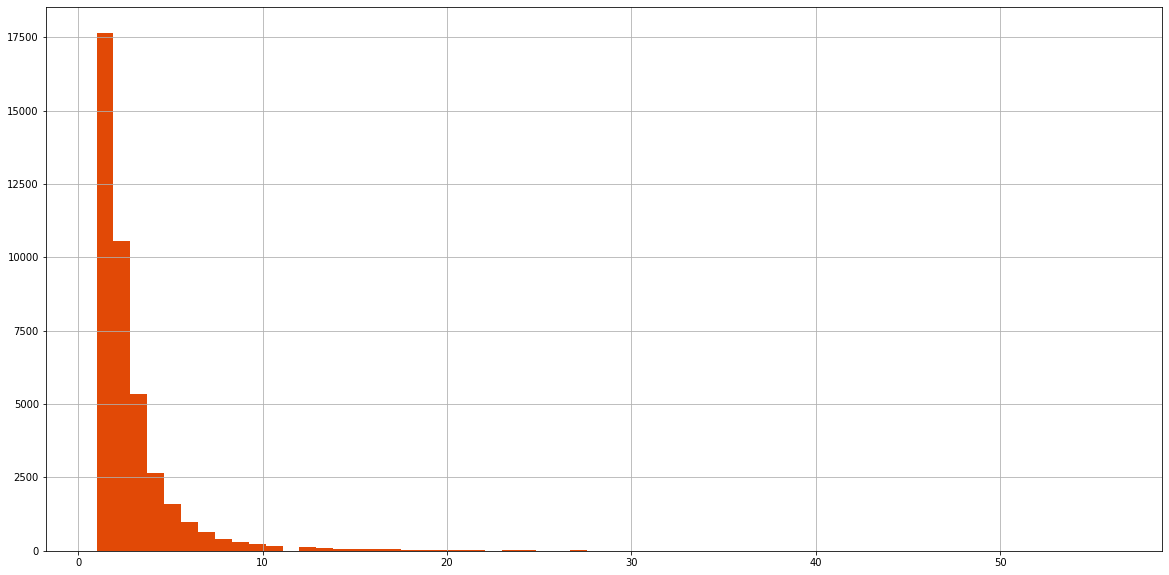

In [30]:
df.campaign.hist(bins=60, figsize=(20,10), color='#E14906')
plt.show()

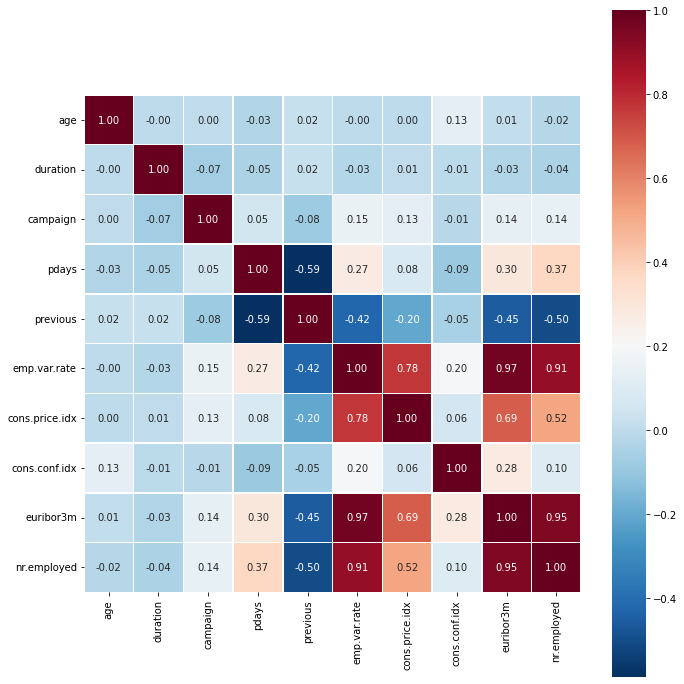

In [31]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()